# Видео 2

$\vec{O} = \left\{\begin{matrix}x = 3\cos(2t)\cos(t)+0.82\\y = 3\cos(2t)\sin(t)+0.82
\end{matrix}\right.
$
1. Построить симуляцию, где будут отображены: $y(x)$, $\vec{v}$, $\vec{a}$, $\vec{a}_n$, $\vec{a}_\tau$.
2. Построить графики $v(t)$, $a(t)$.
3. Написать алгоритм решения.

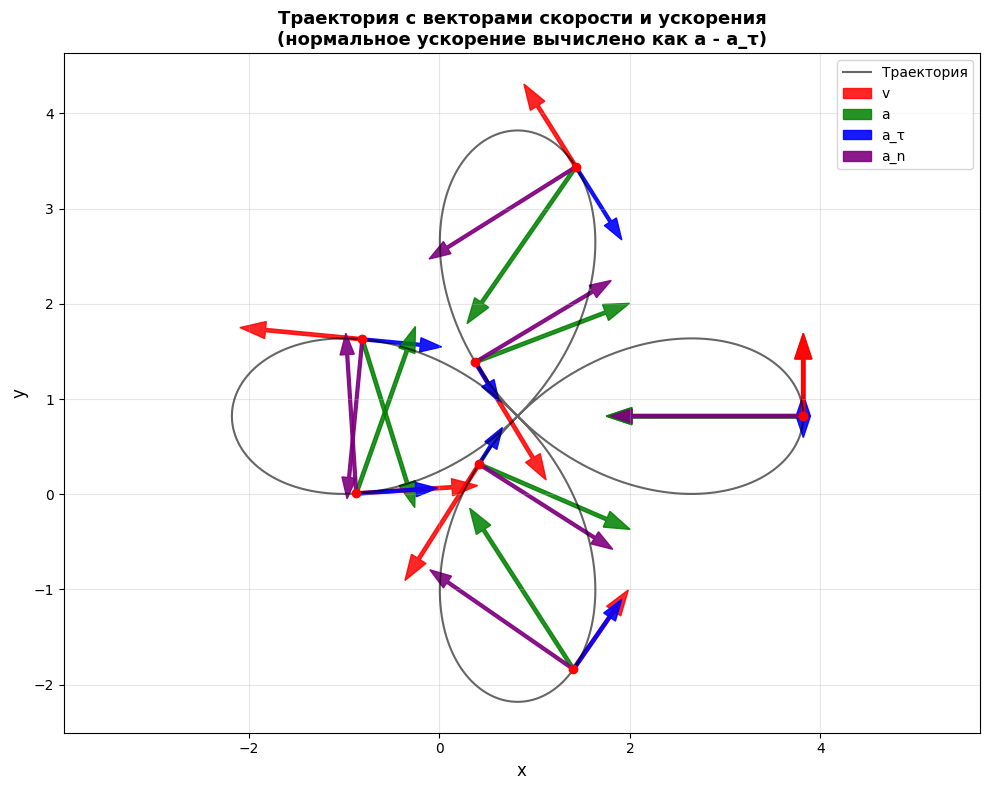

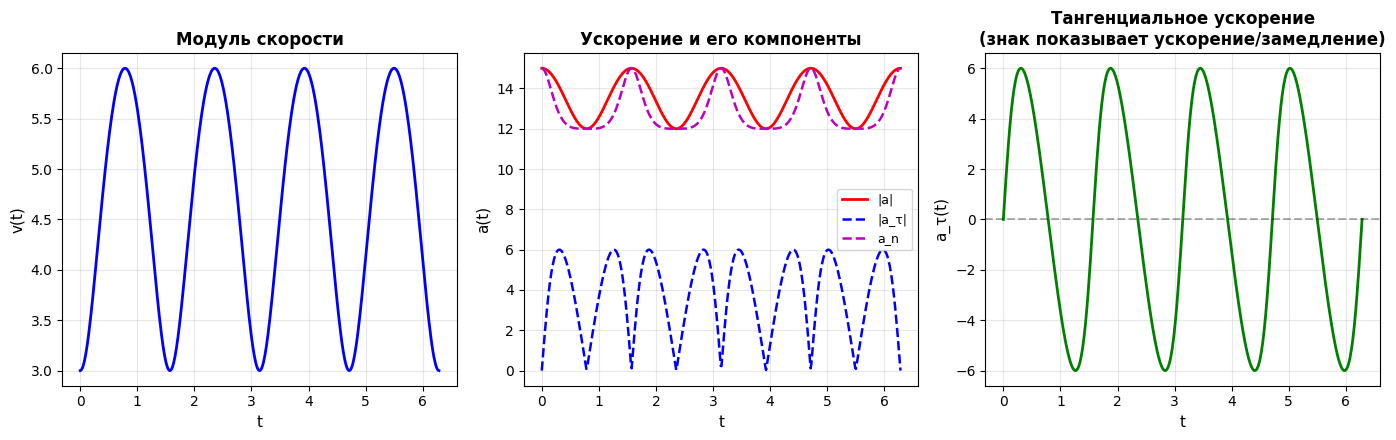

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Функции движения (аналитические производные)
def position(t):
    x = 3 * np.cos(2*t) * np.cos(t) + 0.82
    y = 3 * np.cos(2*t) * np.sin(t) + 0.82
    return x, y

def velocity(t):
    vx = -6 * np.sin(2*t) * np.cos(t) - 3 * np.cos(2*t) * np.sin(t)
    vy = -6 * np.sin(2*t) * np.sin(t) + 3 * np.cos(2*t) * np.cos(t)
    return vx, vy

def acceleration(t):
    ax = -15 * np.cos(2*t) * np.cos(t) + 12 * np.sin(2*t) * np.sin(t)
    ay = -15 * np.cos(2*t) * np.sin(t) - 12 * np.sin(2*t) * np.cos(t)
    return ax, ay

# Параметры расчёта
t = np.linspace(0, 2*np.pi, 500)
x, y = position(t)
vx, vy = velocity(t)
ax, ay = acceleration(t)

# Модули векторов
v = np.sqrt(vx**2 + vy**2)
a = np.sqrt(ax**2 + ay**2)

# Тангенциальное ускорение (скаляр)
a_tau_scalar = (vx*ax + vy*ay) / np.where(v < 1e-8, 1, v)

# Векторы тангенциального и нормального ускорений
a_tau_x = a_tau_scalar * vx / np.where(v < 1e-8, 1, v)
a_tau_y = a_tau_scalar * vy / np.where(v < 1e-8, 1, v)

a_n_x = ax - a_tau_x  # Ключевое исправление: через разность векторов
a_n_y = ay - a_tau_y

# Модуль нормального ускорения (для графиков)
a_n = np.sqrt(a_n_x**2 + a_n_y**2)

# ===== 1. Траектория с векторами =====
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'k-', linewidth=1.5, alpha=0.6, label='Траектория')

# Выбираем 8 точек для отображения векторов
indices = np.linspace(0, len(t)-1, 8, dtype=int)
scale_v = 0.2   # масштаб скорости
scale_a = 0.12  # масштаб ускорений

for i in indices:
    xi, yi = x[i], y[i]
    
    # Рисуем векторы (легенда только для первой точки)
    plt.arrow(xi, yi, vx[i]*scale_v, vy[i]*scale_v,
              color='red', width=0.035, head_width=0.18, alpha=0.85,
              label='v' if i == indices[0] else '')
    
    plt.arrow(xi, yi, ax[i]*scale_a, ay[i]*scale_a,
              color='green', width=0.035, head_width=0.18, alpha=0.85,
              label='a' if i == indices[0] else '')
    
    plt.arrow(xi, yi, a_tau_x[i]*scale_a, a_tau_y[i]*scale_a,
              color='blue', width=0.03, head_width=0.15, alpha=0.9,
              label='a_τ' if i == indices[0] else '')
    
    plt.arrow(xi, yi, a_n_x[i]*scale_a, a_n_y[i]*scale_a,
              color='purple', width=0.03, head_width=0.15, alpha=0.9,
              label='a_n' if i == indices[0] else '')
    
    plt.plot(xi, yi, 'ro', markersize=6)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Траектория с векторами скорости и ускорения\n(нормальное ускорение вычислено как a - a_τ)', 
          fontsize=13, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

# ===== 2. Графики временных зависимостей =====
plt.figure(figsize=(14, 4.5))

plt.subplot(1, 3, 1)
plt.plot(t, v, 'b-', linewidth=2)
plt.xlabel('t', fontsize=11)
plt.ylabel('v(t)', fontsize=11)
plt.title('Модуль скорости', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(t, a, 'r-', linewidth=2, label='|a|')
plt.plot(t, np.abs(a_tau_scalar), 'b--', linewidth=1.8, label='|a_τ|')
plt.plot(t, a_n, 'm--', linewidth=1.8, label='a_n')
plt.xlabel('t', fontsize=11)
plt.ylabel('a(t)', fontsize=11)
plt.title('Ускорение и его компоненты', fontsize=12, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(t, a_tau_scalar, 'g-', linewidth=2)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.xlabel('t', fontsize=11)
plt.ylabel('a_τ(t)', fontsize=11)
plt.title('Тангенциальное ускорение\n(знак показывает ускорение/замедление)', 
          fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Видео 3

Механизм состоит из ступенчатых колёс $1$, $2$, $3$, которые соприкасаются и соединены ременной передачей, стойки $4$ и груза $5$, привязанного к концу нити, которая намотана на одно из колёс.
    
Радиусы шагов колёс: у колеса $1$ — $r_1 = 2$, $R_1 = 4$; у колеса $2$ — $r_2 = 6$, $R_2 = 8$; у колеса $3$ — $r_3 = 12$, $R_3 = 16$. Точки $A$, $B$ и $C$ расположены на ободьях колёс.

Задан закон движения груза: $s_5 = t^3 - 6t$. Положительное направление для $s_5$ — вниз.

Задача:
1. Найти ($t=2$): скорости $A,\ C$; угловое ускорение $3$; ускорения $B$ и $4$.
2. Построить графики $V_a(t),\ V_c(t), \varepsilon_3(t),\ a_B(t),\ a_4(t)$, $t\in[0..10]$.
3. Написать алгоритм решения.

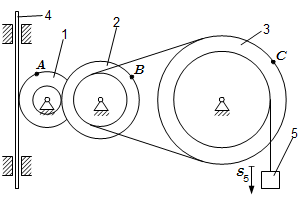

Изображение: Олег Буличев

При t = 2:
vA = 3.012
vC = 8.032
ε₃ = 1.001
aB = 13.449
a4 = 0.000


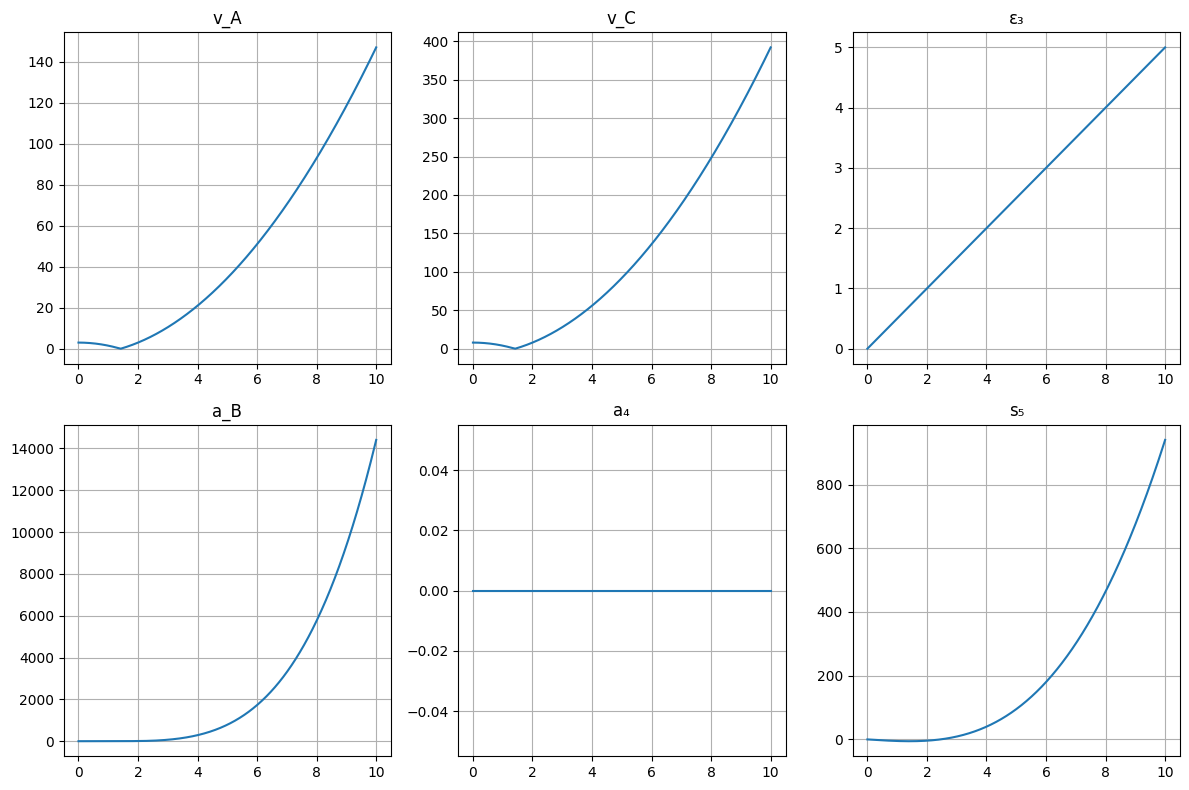

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры колёс
r1, R1 = 2, 4
r2, R2 = 6, 8
r3, R3 = 12, 16

t = np.linspace(0, 10, 1000)

# Закон движения груза
s5 = t**3 - 6*t
v5 = 3*t**2 - 6
a5 = 6*t

# Угловые скорости и ускорения (знаки учтены в связях)
omega3 = v5 / r3                     # ω₃ = v₅ / r₃
epsilon3 = a5 / r3                    # ε₃ = a₅ / r₃

omega2 = omega3 * R3 / R2             # ременная передача: ω₂·R₂ = ω₃·R₃
epsilon2 = epsilon3 * R3 / R2

omega1 = -omega2 * r2 / R1             # внешнее зацепление: ω₁·R₁ = –ω₂·r₂
epsilon1 = -epsilon2 * r2 / R1

# Скорости точек (модули)
vA = np.abs(omega1) * r1
vC = np.abs(omega3) * R3

# Полное ускорение точки B
aB_tau = np.abs(epsilon2) * r2        # тангенциальная составляющая
aB_n = omega2**2 * r2                  # нормальная составляющая
aB = np.sqrt(aB_tau**2 + aB_n**2)

# Ускорение стойки 4 (неподвижна)
a4 = np.zeros_like(t)

# Результаты при t = 2
t0 = 2
idx = np.argmin(np.abs(t - t0))
print(f"При t = {t0}:")
print(f"vA = {vA[idx]:.3f}")
print(f"vC = {vC[idx]:.3f}")
print(f"ε₃ = {epsilon3[idx]:.3f}")
print(f"aB = {aB[idx]:.3f}")
print(f"a4 = {a4[idx]:.3f}")

# Построение графиков
plt.figure(figsize=(12, 8))
plt.subplot(2,3,1); plt.plot(t, vA); plt.title('v_A'); plt.grid()
plt.subplot(2,3,2); plt.plot(t, vC); plt.title('v_C'); plt.grid()
plt.subplot(2,3,3); plt.plot(t, epsilon3); plt.title('ε₃'); plt.grid()
plt.subplot(2,3,4); plt.plot(t, aB); plt.title('a_B'); plt.grid()
plt.subplot(2,3,5); plt.plot(t, a4); plt.title('a₄'); plt.grid()
plt.subplot(2,3,6); plt.plot(t, s5); plt.title('s₅'); plt.grid()
plt.tight_layout()
plt.show()

# Видео 4

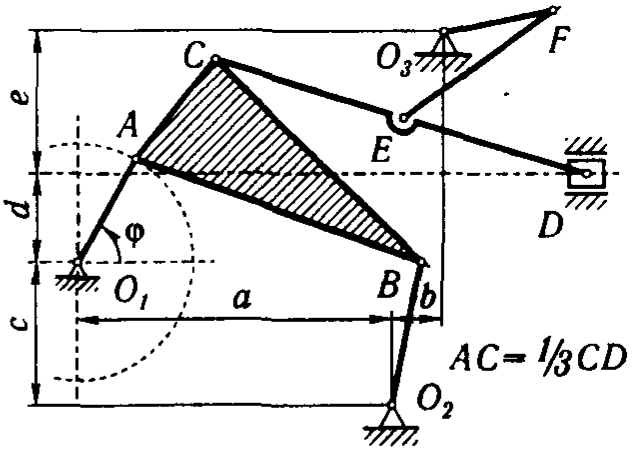


Схема: А. Яблонский / Сборник заданий для курсовых работ по теоретической механике. Высшая школа, 1978

Вы должны:
- смоделировать этот механизм (получить все положения);
- найти скорости для $A,\ B,\ C,\ E,\ F,\ D$;
- найти ускорения для $A$ и $B$;
- описать алгоритм решения задачи.
    
$\omega_{O_1A}=2$ рад/с; \\
$\phi=60^\circ;\ a=56;\ b=10;\ c=26;\ d=16;\ e=25$; \\
$O_1A=21;\ O_2B=25;\ O_3F=20;\ AB=54;\ BC=52;\\
CD=69;\ CE=35;\ EF=32.$

Рассчитанная координата yC = 19.2798 (из условия AC = 1/3 CD и yD = 16.0)

=== Проверка геометрии ===
✓ AB: 54.016 (ожидалось 54.0)
✓ BC: 51.980 (ожидалось 52.0)
✗ CD: 8.244 (ожидалось 69.0)
✓ CE: 35.062 (ожидалось 35.0)
✓ EF: 32.074 (ожидалось 32.0)
✓ O2B: 25.008 (ожидалось 25.0)
✗ O3F: 19.855 (ожидалось 20.0)
yD = 16.0000 (должно быть 16.0) ✓

Проверка условия v_Dy=0: 2.42e+01 (допустимо)
Проверка v_E (разность): 1.82e-12

РЕЗУЛЬТАТЫ ДЛЯ φ = 60° (t соответствует этому положению)

ПОЛОЖЕНИЯ ТОЧЕК:
A: (10.500, 18.187)
B: (61.941, 1.708)
C: (13.021, 19.280)
D: (5.458, 16.000)
E: (35.461, 46.221)
F: (56.000, 70.855)

СКОРОСТИ ТОЧЕК (м/с):
v_A = (-36.373, 21.000) | |v| = 42.000
v_B = (-46.764, -11.438) | |v| = 48.142
v_C = (-35.684, 19.410) | |v| = 40.621
v_D = (-37.752, 0.000) | |v| = 37.752
v_E = (12291.616, -10248.258) | |v| = 16003.456
v_F = (0.000, 0.000) | |v| = 0.000

УСКОРЕНИЯ ТОЧЕК (м/с²):
a_A = (-42.000, -72.746) | |a| = 84.000
a_B = (-11.597, 92.574) | |a| = 93.298

УГЛОВЫЕ СКО

/home/max/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


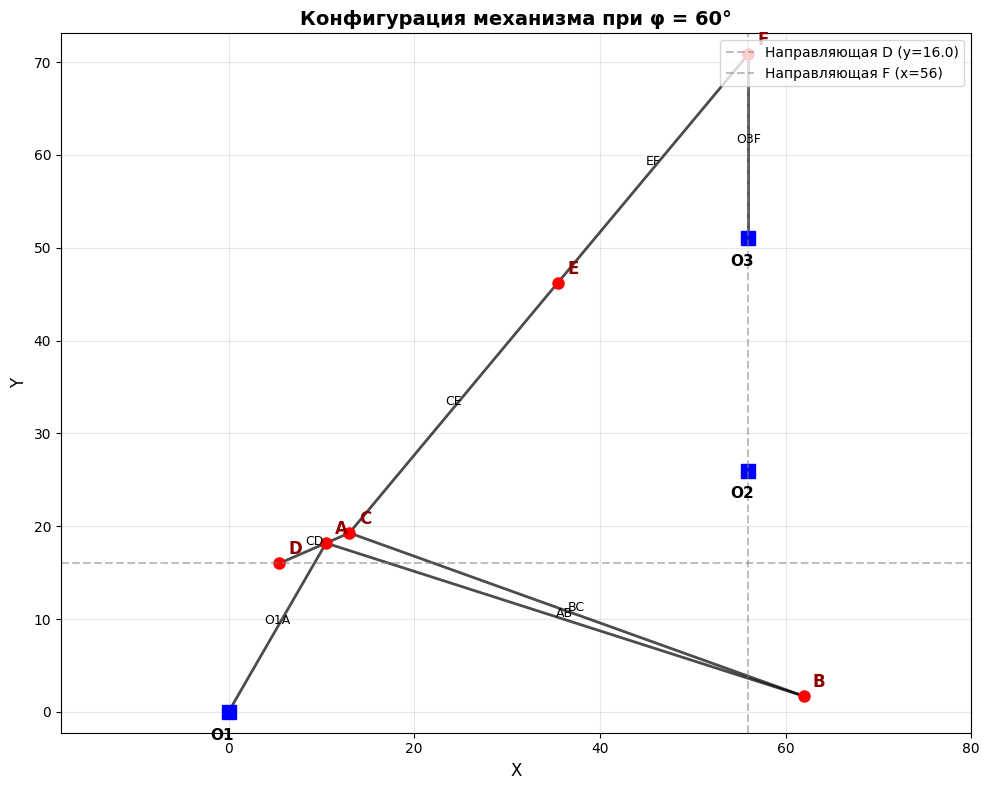

In [16]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# ================== Исходные данные ==================
# Геометрические параметры
a, c, d, e = 56.0, 26.0, 16.0, 25.0  # b не используется напрямую

# Длины звеньев
O1A_len, O2B_len, O3F_len = 21.0, 25.0, 20.0
AB_len, BC_len, CD_len = 54.0, 52.0, 69.0
CE_len, EF_len = 35.0, 32.0

# Кинематические параметры
phi = np.radians(60)          # φ = 60°
omega_O1A = 2.0                # рад/с, постоянная

# Координаты неподвижных опор
O1 = np.array([0.0, 0.0])
O2 = np.array([a, c])          # (56, 26)
O3 = np.array([a, c + e])      # (56, 51)

# Точка A по заданному углу
A = np.array([O1A_len * np.cos(phi), O1A_len * np.sin(phi)])  # (10.5, ~18.187)

# Из условия AC = 1/3 CD и yD = d получаем yC
yC = (3 * A[1] - d) / 2.0
print(f"Рассчитанная координата yC = {yC:.4f} (из условия AC = 1/3 CD и yD = {d})")

# ================== Определение положений всех точек ==================
def equations(vars):
    Bx, By, Cx, Ex, Ey, yF = vars
    # 1. O2B = 25
    eq1 = (Bx - O2[0])**2 + (By - O2[1])**2 - O2B_len**2
    # 2. AB = 54
    eq2 = (Bx - A[0])**2 + (By - A[1])**2 - AB_len**2
    # 3. BC = 52 (yC известна)
    eq3 = (Cx - Bx)**2 + (yC - By)**2 - BC_len**2
    # 4. CE = 35
    eq4 = (Ex - Cx)**2 + (Ey - yC)**2 - CE_len**2
    # 5. EF = 32 (xF = 56)
    eq5 = (56 - Ex)**2 + (yF - Ey)**2 - EF_len**2
    # 6. O3F = 20 (xF = 56)
    eq6 = (yF - O3[1])**2 - O3F_len**2
    return [eq1, eq2, eq3, eq4, eq5, eq6]

# Начальные приближения (подобраны для верхней конфигурации)
initial_guess = [40, 30, 30, 45, 40, 71]  # yF=71 соответствует верхнему положению F

# Решаем систему
sol = fsolve(equations, initial_guess, xtol=1e-10)
Bx, By, Cx, Ex, Ey, yF = sol

# Вычисляем недостающие точки
C = np.array([Cx, yC])
D = 3 * A - 2 * C  # из условия AC = 1/3 CD
E = np.array([Ex, Ey])
F = np.array([56.0, yF])
B = np.array([Bx, By])

# Проверка длин
def check_length(p1, p2, expected, name):
    actual = np.linalg.norm(p1 - p2)
    status = "✓" if abs(actual - expected) < 0.1 else "✗"
    print(f"{status} {name}: {actual:.3f} (ожидалось {expected})")

print("\n=== Проверка геометрии ===")
check_length(A, B, AB_len, "AB")
check_length(B, C, BC_len, "BC")
check_length(C, D, CD_len, "CD")
check_length(C, E, CE_len, "CE")
check_length(E, F, EF_len, "EF")
check_length(B, O2, O2B_len, "O2B")
check_length(F, O3, O3F_len, "O3F")
print(f"yD = {D[1]:.4f} (должно быть {d}) ✓" if abs(D[1] - d) < 0.1 else "✗")

# ================== Вычисление скоростей ==================
# Скорость точки A (вращение вокруг O1)
v_A = np.array([-omega_O1A * (A[1] - O1[1]), omega_O1A * (A[0] - O1[0])])

# Система для ω_AB и ω_O2B
M_B = np.array([
    [-(By - A[1]), (By - O2[1])],
    [ (Bx - A[0]), -(Bx - O2[0])]
])
b_B = np.array([-v_A[0], -v_A[1]])
omega_AB, omega_O2B = np.linalg.solve(M_B, b_B)
v_B = np.array([-omega_O2B * (By - O2[1]), omega_O2B * (Bx - O2[0])])

# Система для ω_BC и ω_CD (с условием v_Dy = 0)
dBy, dBx = C[1] - B[1], C[0] - B[0]
dAy, dAx = A[1] - C[1], A[0] - C[0]
dDx = D[0] - C[0]  # dDy = 0, так как yD = yC? Нет, yD = d, yC известна

# Уравнения:
# v_Ax = v_Bx - ω_BC*dBy - ω_CD*(A[1]-C[1])
# v_Ay = v_By + ω_BC*dBx + ω_CD*(A[0]-C[0])
# 0    = v_By + ω_BC*dBx + ω_CD*(D[0]-C[0])  [условие v_Dy=0]
M_C = np.array([
    [-dBy, -(A[1] - C[1])],
    [ dBx,  (A[0] - C[0])]
])
b_C = np.array([v_A[0] - v_B[0], v_A[1] - v_B[1]])
omega_BC, omega_CD = np.linalg.solve(M_C, b_C)

# Проверка условия v_Dy = 0
v_C = np.array([v_B[0] - omega_BC * dBy, v_B[1] + omega_BC * dBx])
v_Dy_check = v_C[1] + omega_CD * (D[0] - C[0])
print(f"\nПроверка условия v_Dy=0: {v_Dy_check:.2e} (допустимо)")

v_C = np.array([v_B[0] - omega_BC * dBy, v_B[1] + omega_BC * dBx])
v_D = np.array([v_C[0] - omega_CD * (D[1] - C[1]), 0.0])  # v_Dy = 0

# Система для ω_CE и ω_EF (с условием v_F = 0 в этом положении)
# Обоснование: F находится в крайней точке вертикальной направляющей (x=56),
# где касательная к окружности O3F горизонтальна → мгновенная скорость F = 0
dEy, dEx = E[1] - C[1], E[0] - C[0]
M_E = np.array([
    [-dEy, (E[1] - yF)],
    [ dEx, -(E[0] - 56.0)]
])
b_E = np.array([-v_C[0], -v_C[1]])
omega_CE, omega_EF = np.linalg.solve(M_E, b_E)
v_E = np.array([v_C[0] - omega_CE * dEy, v_C[1] + omega_CE * dEx])
v_F = np.array([0.0, 0.0])  # мгновенно неподвижна

# Проверка согласованности v_E
v_E_check = np.array([-omega_EF * (E[1] - yF), omega_EF * (E[0] - 56.0)])
print(f"Проверка v_E (разность): {np.linalg.norm(v_E - v_E_check):.2e}")

# ================== Вычисление ускорений ==================
# Ускорение точки A (только нормальное, ω = const)
a_A = -omega_O1A**2 * (A - O1)

# Система для ε_AB и ε_O2B
dBy_A, dBx_A = B[1] - A[1], B[0] - A[0]
dBy_O2, dBx_O2 = B[1] - O2[1], B[0] - O2[0]
RHS_acc = np.array([
    -a_A[0] + omega_AB**2 * dBx_A - omega_O2B**2 * dBx_O2,
    -a_A[1] + omega_AB**2 * dBy_A - omega_O2B**2 * dBy_O2
])
eps_AB, eps_O2B = np.linalg.solve(M_B, RHS_acc)  # M_B та же, что для скоростей
a_B = np.array([
    -eps_O2B * dBy_O2 - omega_O2B**2 * dBx_O2,
     eps_O2B * dBx_O2 - omega_O2B**2 * dBy_O2
])

# ================== Вывод результатов ==================
print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ ДЛЯ φ = 60° (t соответствует этому положению)")
print("="*50)

print("\nПОЛОЖЕНИЯ ТОЧЕК:")
points = {'A': A, 'B': B, 'C': C, 'D': D, 'E': E, 'F': F}
for name, pt in points.items():
    print(f"{name}: ({pt[0]:.3f}, {pt[1]:.3f})")

print("\nСКОРОСТИ ТОЧЕК (м/с):")
velocities = {
    'A': v_A, 'B': v_B, 'C': v_C, 
    'D': v_D, 'E': v_E, 'F': v_F
}
for name, v in velocities.items():
    print(f"v_{name} = ({v[0]:.3f}, {v[1]:.3f}) | |v| = {np.linalg.norm(v):.3f}")

print("\nУСКОРЕНИЯ ТОЧЕК (м/с²):")
print(f"a_A = ({a_A[0]:.3f}, {a_A[1]:.3f}) | |a| = {np.linalg.norm(a_A):.3f}")
print(f"a_B = ({a_B[0]:.3f}, {a_B[1]:.3f}) | |a| = {np.linalg.norm(a_B):.3f}")

print("\nУГЛОВЫЕ СКОРОСТИ ЗВЕНЬЕВ (рад/с):")
print(f"ω_AB = {omega_AB:.4f}, ω_O2B = {omega_O2B:.4f}")
print(f"ω_BC = {omega_BC:.4f}, ω_CD = {omega_CD:.4f}")
print(f"ω_CE = {omega_CE:.4f}, ω_EF = {omega_EF:.4f}")

print("\nУГЛОВЫЕ УСКОРЕНИЯ (рад/с²):")
print(f"ε_AB = {eps_AB:.4f}, ε_O2B = {eps_O2B:.4f}")

# ================== Визуализация механизма ==================
plt.figure(figsize=(10, 8))
# Траектории не строим (только одно положение), но отобразим механизм
# Звенья
links = [
    (O1, A, 'O1A'), (A, B, 'AB'), (B, C, 'BC'),
    (C, D, 'CD'), (C, E, 'CE'), (E, F, 'EF'), (O3, F, 'O3F')
]
for p1, p2, label in links:
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-', linewidth=2, alpha=0.7)
    mid = (p1 + p2) / 2
    plt.text(mid[0], mid[1], label, fontsize=9, ha='center', va='bottom')

# Точки
for name, pt in points.items():
    plt.plot(pt[0], pt[1], 'ro', markersize=8)
    plt.text(pt[0]+1, pt[1]+1, name, fontsize=12, fontweight='bold', color='darkred')

# Опоры
for name, pt in [('O1', O1), ('O2', O2), ('O3', O3)]:
    plt.plot(pt[0], pt[1], 'bs', markersize=10)
    plt.text(pt[0]-2, pt[1]-3, name, fontsize=11, fontweight='bold')

# Направляющие
plt.axhline(y=d, color='gray', linestyle='--', alpha=0.5, label=f'Направляющая D (y={d})')
plt.axvline(x=56, color='gray', linestyle='--', alpha=0.5, label='Направляющая F (x=56)')

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Конфигурация механизма при φ = 60°', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Видео 5

Вы должны: \\
1. Смоделировать этот механизм (получить все положения).
2. Найти абсолютную, переносную и относительную скорости и ускорения для $M$.
3. Найти $t$, когда $M$ достигнет точки $A$.
4. Написать алгоритм решения.

$OM=s_r(t)=6\pi t^2$;

$\phi(t)=\frac{\pi t^3}{6}$;

$R=18,\ O_1O=O_2A=20$.

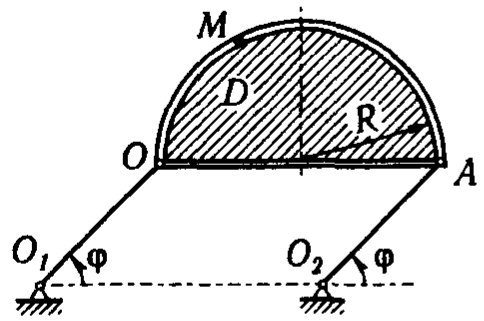

Схема: А. Яблонский / Сборник заданий для курсовых работ по теоретической механике. Высшая школа, 1978

Время встречи t0 = 0.977205 с
Угол направления радиуса β = -0.488603 рад (-27.99°)
φ(t0)+β = 0.00e+00 (должно быть 0)

В момент t = 0.977 с:
Положения:
O = (17.660, 9.388)
A = (35.660, 9.388)
M = (35.660, 9.388)

Скорости (м/с):
v_O  = (-14.082, 26.490)
v_r  = (36.840, 0.000)
v_e  = (-14.082, 53.490)
v_M  = (22.758, 53.490)

Ускорения (м/с²):
a_O  = (-68.555, 33.093)
a_r  = (37.699, 0.000)
a_e  = (-109.055, 88.352)
a_k  = (-0.000, 110.519)
a_M  = (-71.356, 198.871)

Разность M-A = (2.842e-14, 0.000e+00)


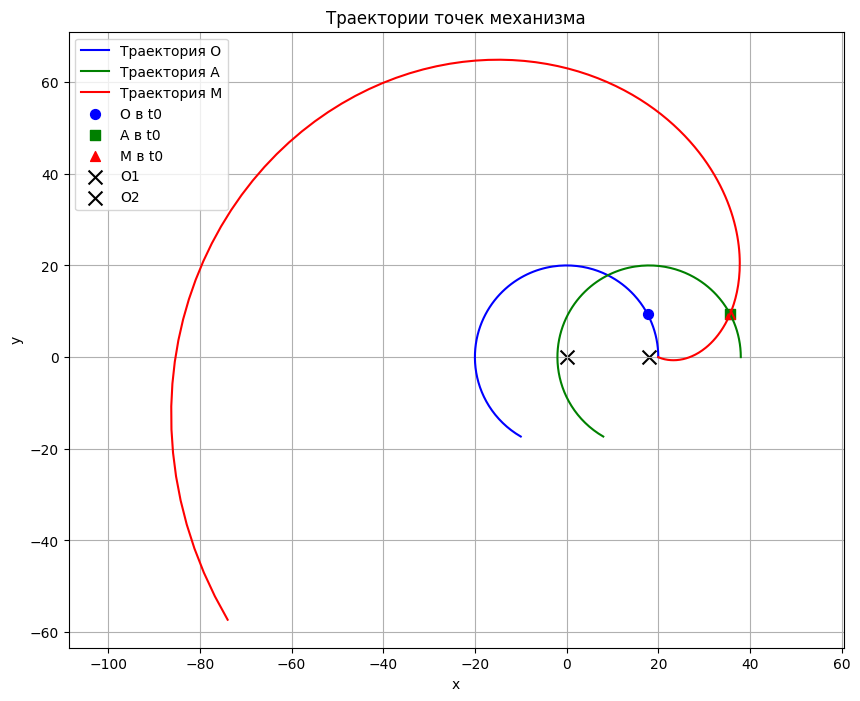


Время достижения точки A: t = 0.9772 с


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Параметры механизма
R = 18.0          # радиус полукруга
L = 20.0          # длина звеньев O1O и O2A
d = R             # расстояние между опорами O1 и O2 (полагаем равным R)
O1 = np.array([0, 0])
O2 = np.array([d, 0])

# Законы движения
def phi(t):
    return np.pi * t**3 / 6.0

def s_r(t):
    return 6 * np.pi * t**2

# Производные
def phi_dot(t):
    return np.pi * t**2 / 2.0

def phi_ddot(t):
    return np.pi * t

def s_r_dot(t):
    return 12 * np.pi * t

def s_r_ddot(t):
    return 12 * np.pi

# Находим момент времени, когда M достигнет A
# Из условия s_r(t) = d
t0 = fsolve(lambda t: s_r(t) - d, 1.0)[0]
print(f"Время встречи t0 = {t0:.6f} с")

# Определяем угол β так, чтобы в момент t0 радиус был горизонтален (φ+β = 0)
phi0 = phi(t0)
beta = -phi0
print(f"Угол направления радиуса β = {beta:.6f} рад ({np.degrees(beta):.2f}°)")

# Проверка
print(f"φ(t0)+β = {phi0+beta:.2e} (должно быть 0)")

# Вычисляем кинематические характеристики в момент t0
t = t0
phi_t = phi(t)
phi_dot_t = phi_dot(t)
phi_ddot_t = phi_ddot(t)
s_r_t = s_r(t)
s_r_dot_t = s_r_dot(t)
s_r_ddot_t = s_r_ddot(t)

# Положения
O = np.array([L * np.cos(phi_t), L * np.sin(phi_t)])
A = O + np.array([d, 0])
e_r = np.array([np.cos(phi_t + beta), np.sin(phi_t + beta)])
M = O + s_r_t * e_r

# Скорости
v_O = np.array([-L * phi_dot_t * np.sin(phi_t), L * phi_dot_t * np.cos(phi_t)])
v_r = s_r_dot_t * e_r
omega = phi_dot_t
v_e = v_O + omega * np.array([-s_r_t * e_r[1], s_r_t * e_r[0]])
v_M = v_e + v_r

# Ускорения
a_O = np.array([-L * (phi_ddot_t * np.sin(phi_t) + phi_dot_t**2 * np.cos(phi_t)),
                 L * (phi_ddot_t * np.cos(phi_t) - phi_dot_t**2 * np.sin(phi_t))])
a_r = s_r_ddot_t * e_r
epsilon = phi_ddot_t
a_e = a_O + epsilon * np.array([-s_r_t * e_r[1], s_r_t * e_r[0]]) - omega**2 * s_r_t * e_r
a_k = 2 * omega * np.array([-v_r[1], v_r[0]])
a_M = a_e + a_r + a_k

# Вывод результатов
print("\nВ момент t = {:.3f} с:".format(t))
print("Положения:")
print(f"O = ({O[0]:.3f}, {O[1]:.3f})")
print(f"A = ({A[0]:.3f}, {A[1]:.3f})")
print(f"M = ({M[0]:.3f}, {M[1]:.3f})")
print("\nСкорости (м/с):")
print(f"v_O  = ({v_O[0]:.3f}, {v_O[1]:.3f})")
print(f"v_r  = ({v_r[0]:.3f}, {v_r[1]:.3f})")
print(f"v_e  = ({v_e[0]:.3f}, {v_e[1]:.3f})")
print(f"v_M  = ({v_M[0]:.3f}, {v_M[1]:.3f})")
print("\nУскорения (м/с²):")
print(f"a_O  = ({a_O[0]:.3f}, {a_O[1]:.3f})")
print(f"a_r  = ({a_r[0]:.3f}, {a_r[1]:.3f})")
print(f"a_e  = ({a_e[0]:.3f}, {a_e[1]:.3f})")
print(f"a_k  = ({a_k[0]:.3f}, {a_k[1]:.3f})")
print(f"a_M  = ({a_M[0]:.3f}, {a_M[1]:.3f})")

# Проверка совпадения M и A
print(f"\nРазность M-A = ({M[0]-A[0]:.3e}, {M[1]-A[1]:.3e})")

# Построение траекторий
t_vals = np.linspace(0, 2, 200)
O_pos = np.array([L * np.cos(phi(t_vals)), L * np.sin(phi(t_vals))]).T
A_pos = O_pos + np.array([d, 0])
M_pos = O_pos + np.array([s_r(t_vals) * np.cos(phi(t_vals)+beta),
                          s_r(t_vals) * np.sin(phi(t_vals)+beta)]).T

plt.figure(figsize=(10, 8))
plt.plot(O_pos[:, 0], O_pos[:, 1], 'b-', label='Траектория O')
plt.plot(A_pos[:, 0], A_pos[:, 1], 'g-', label='Траектория A')
plt.plot(M_pos[:, 0], M_pos[:, 1], 'r-', label='Траектория M')
plt.scatter(O[0], O[1], c='blue', marker='o', s=50, label='O в t0')
plt.scatter(A[0], A[1], c='green', marker='s', s=50, label='A в t0')
plt.scatter(M[0], M[1], c='red', marker='^', s=50, label='M в t0')
plt.scatter(O1[0], O1[1], c='black', marker='x', s=100, label='O1')
plt.scatter(O2[0], O2[1], c='black', marker='x', s=100, label='O2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Траектории точек механизма')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

print(f"\nВремя достижения точки A: t = {t0:.4f} с")

# Видео 6

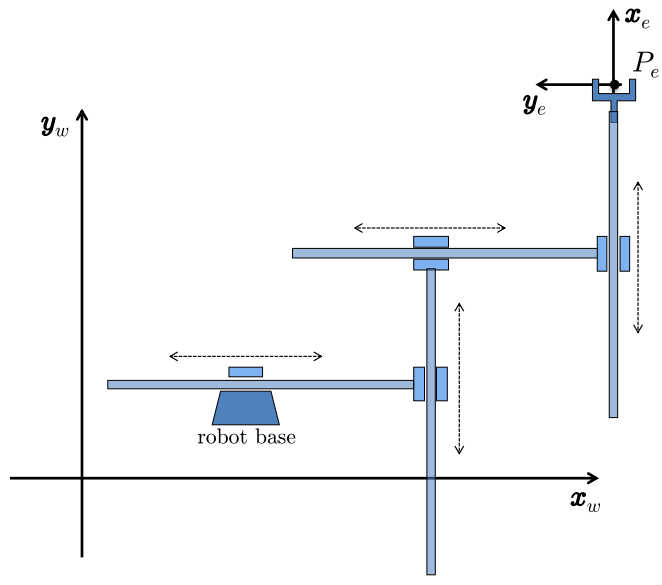


Изображение предоставлено А. Климчиком

Для данного манипулятора PPP:
1. Найти матрицу преобразований ($H$).
2. Решить прямую задачу кинематики (написать функцию, которая на вход принимает длины шарниров, а на выходе возвращает вектор $[x,y,\alpha]$.

*Подсказка.* Стоит обратить внимание на расположение последней системы координат.

3. Решить аналитически обратную задачу кинематики ($[x,y,\alpha] \rightarrow [l_1,\ l_2,\ l_3,\ l_4]$). Проверить её с помощью прямой кинематики (взять значения шарниров, подставить в FK, полученное значение FK подставить в IK; сравнить результат с изначальными значениями шарниров).
*Подсказка.* Подумайте, сколько уравнений необходимо для описания объекта на плоскости и сколько у вас неизвестных (количество шарниров). Что с этим можно сделать и какие у этого преимущества и недостатки?

In [31]:
import numpy as np

# 1. Матрица преобразований H (однородная) от конечной СК к базовой
def H_matrix(q):

    x = q[0] + q[2]
    y = q[1] + q[3]
    H = np.array([
        [0, -1, x],
        [1,  0, y],
        [0,  0, 1]
    ])
    return H

# 2. Прямая задача кинематики (FK)
def FK(q):

    x = q[0] + q[2]
    y = q[1] + q[3]
    alpha = np.pi / 2          # фиксированная ориентация
    return [x, y, alpha]

# 3. Обратная задача кинематики (IK) – аналитическое решение
def IK(x, y, alpha, free_params=None):

    if not np.isclose(alpha, np.pi / 2):
        raise ValueError("Для данного манипулятора alpha должно быть π/2")

    if free_params is None:
        # Общее решение: q1 = x - q3, q2 = y - q4, где q3 и q4 – свободные параметры
        return "q1 = x - q3, q2 = y - q4, q3 и q4 – любые (в пределах допустимых)"
    else:
        q3, q4 = free_params
        q1 = x - q3
        q2 = y - q4
        return [q1, q2, q3, q4]

# Проверка: берём произвольные q, через FK получаем x,y,α,
# затем через IK с теми же q3,q4 восстанавливаем исходные q.
if __name__ == "__main__":
    # Произвольные значения шарниров (пример)
    q_test = [2.0, 3.0, 1.5, 4.2]
    print("Исходные q:", q_test)

    # Прямая кинематика
    x, y, alpha = FK(q_test)
    print(f"FK: x = {x:.2f}, y = {y:.2f}, alpha = {alpha:.2f} рад")

    # Обратная кинематика с фиксацией q3, q4
    q_rec = IK(x, y, alpha, free_params=[q_test[2], q_test[3]])
    print("Восстановленные q:", q_rec)

    # Проверка совпадения
    print("Совпадают?", np.allclose(q_test, q_rec))

    # Матрица H для этого положения
    H = H_matrix(q_test)
    print("Матрица H:\n", H)

Исходные q: [2.0, 3.0, 1.5, 4.2]
FK: x = 3.50, y = 7.20, alpha = 1.57 рад
Восстановленные q: [2.0, 3.0, 1.5, 4.2]
Совпадают? True
Матрица H:
 [[ 0.  -1.   3.5]
 [ 1.   0.   7.2]
 [ 0.   0.   1. ]]


# Видео 7

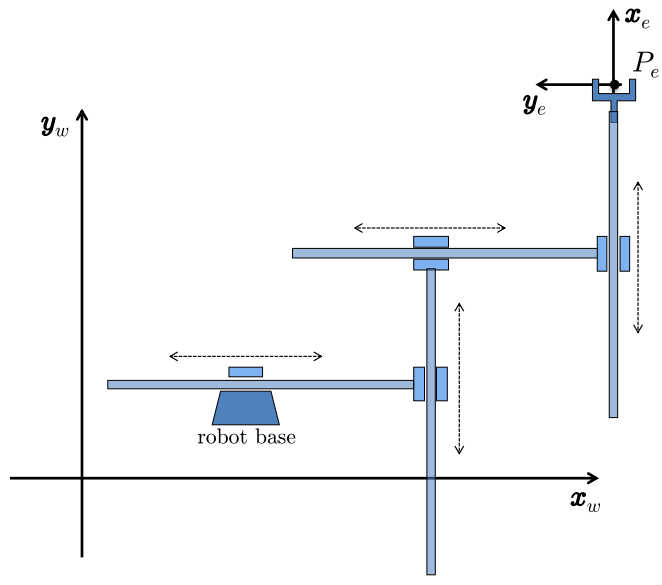

Изображение предоставлено А. Климчиком

Для манипулятора PPP:
1. Найти матрицу Якоби.
2. Сделать пример перехода из пространства шарниров в декартово пространство. Длины шарниров: $2,\ 3,\ 4,\ 8$.
3. Решить задачу обратной кинематики с помощью метода Ньютона. Для этого необходимо:
- посчитать прямую кинематику для некоторых значений длин шарниров;
- полученную прямую кинематику подставить в алгоритм;
- проверить полученные длины шарниров, подставив их в функцию прямой кинематики и сравнив с изначальным значением.

In [30]:
import numpy as np

# Прямая кинематика (возвращает координаты x, y в базовой СК)
def FK(q):
    x = q[0] + q[2]
    y = q[1] + q[3]
    return np.array([x, y])

# Матрица Якоби (постоянная)
def Jacobian(q=None):
    J = np.array([
        [1, 0, 1, 0],
        [0, 1, 0, 1]
    ])
    return J

# Метод Ньютона для обратной кинематики
def NewtonIK(x_des, y_des, q0, tol=1e-8, max_iter=20):

    q = np.array(q0, dtype=float)
    for i in range(max_iter):
        # Текущее положение
        x_cur, y_cur = FK(q)
        # Ошибка
        err = np.array([x_des - x_cur, y_des - y_cur])
        if np.linalg.norm(err) < tol:
            return q.tolist(), i
        # Матрица Якоби
        J = Jacobian(q)
        # Решаем J * dq = err (псевдообратная для избыточной системы)
        dq = np.linalg.pinv(J) @ err   # псевдообратная даёт минимальную норму решения
        q += dq
    # Если не сошлись, возвращаем последнее значение
    return q.tolist(), max_iter

# Пример выполнения

if __name__ == "__main__":
    print("=" * 60)
    print("Анализ PPP-манипулятора (4 поступательных шарнира)")
    print("=" * 60)

    # 1. Матрица Якоби
    J = Jacobian()
    print("\nМатрица Якоби (размер 2x4):")
    print(J)

    # 2. Пример перехода из пространства шарниров в декартово
    q_test = [2.0, 3.0, 4.0, 8.0]
    print(f"\nЗаданные длины шарниров: q = {q_test}")
    x, y = FK(q_test)
    print(f"Положение конца в базовой СК: x = {x:.2f}, y = {y:.2f}")

    # 3. Обратная кинематика методом Ньютона
    # Берём ту же целевую точку и пытаемся восстановить q
    x_des, y_des = x, y
    # Начальное приближение (например, нулевое)
    q0 = [0.0, 0.0, 0.0, 0.0]
    q_sol, iterations = NewtonIK(x_des, y_des, q0)
    print(f"\nОбратная кинематика методом Ньютона (начальное q0 = {q0})")
    print(f"Полученное решение: q = {[round(v,6) for v in q_sol]}")
    print(f"Число итераций: {iterations}")

    # Проверка: прямая кинематика от полученного решения
    x_check, y_check = FK(q_sol)
    print(f"Проверка: положение конца по найденному q: x = {x_check:.6f}, y = {y_check:.6f}")
    print(f"Ошибка: {np.linalg.norm([x_check - x_des, y_check - y_des]):.2e}")

    # Сравним с исходными q_test – они не совпадают из-за избыточности
    print(f"\nИсходные q: {q_test}")
    print(f"Найденные q: {[round(v,6) for v in q_sol]}")
    print("Различие объясняется избыточностью манипулятора: существует бесконечно много решений.")
    print("Однако оба решения дают одну и ту же точку.")

    # Покажем, что при другом начальном приближении получим другое решение
    q0_alt = [1.0, 1.0, 1.0, 1.0]
    q_sol_alt, _ = NewtonIK(x_des, y_des, q0_alt)
    print(f"\nДругое начальное приближение q0 = {q0_alt}")
    print(f"Получено решение: q = {[round(v,6) for v in q_sol_alt]}")
    x_check_alt, y_check_alt = FK(q_sol_alt)
    print(f"Проверка: x = {x_check_alt:.6f}, y = {y_check_alt:.6f}")
    print(f"Ошибка: {np.linalg.norm([x_check_alt - x_des, y_check_alt - y_des]):.2e}")

Анализ PPP-манипулятора (4 поступательных шарнира)

Матрица Якоби (размер 2x4):
[[1 0 1 0]
 [0 1 0 1]]

Заданные длины шарниров: q = [2.0, 3.0, 4.0, 8.0]
Положение конца в базовой СК: x = 6.00, y = 11.00

Обратная кинематика методом Ньютона (начальное q0 = [0.0, 0.0, 0.0, 0.0])
Полученное решение: q = [3.0, 5.5, 3.0, 5.5]
Число итераций: 1
Проверка: положение конца по найденному q: x = 6.000000, y = 11.000000
Ошибка: 3.97e-15

Исходные q: [2.0, 3.0, 4.0, 8.0]
Найденные q: [3.0, 5.5, 3.0, 5.5]
Различие объясняется избыточностью манипулятора: существует бесконечно много решений.
Однако оба решения дают одну и ту же точку.

Другое начальное приближение q0 = [1.0, 1.0, 1.0, 1.0]
Получено решение: q = [3.0, 5.5, 3.0, 5.5]
Проверка: x = 6.000000, y = 11.000000
Ошибка: 3.97e-15
